In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
from scipy.stats import trim_mean
from statsmodels import robust
import wquantiles


In [2]:
df = pd.read_csv("data/churn_raw_data.csv",
                dtype={'Zip': str},
                index_col=[0])

In [3]:
c = df.Customer_id

In [4]:
c.is_unique

True

In [5]:
df.Interaction.is_unique


True

In [6]:
df.Population.is_unique

False

In [7]:
df.Customer_id.value_counts(sort=True, ascending=False)

Q455677    1
Z719846    1
B148329    1
S719339    1
Q877999    1
          ..
A464657    1
X320753    1
A176270    1
A471876    1
E571411    1
Name: Customer_id, Length: 10000, dtype: int64

In [8]:
df.head(6).T

,1,2,3,4,5,6
CaseOrder,1,2,3,4,5,6
Customer_id,K409198,S120509,K191035,D90850,K662701,W303516
Interaction,aa90260b-4141-4a24-8e36-b04ce1f4f77b,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,344d114c-3736-4be5-98f7-c72c281e2d35,abfa2b40-2d43-4994-b15a-989b8c79e311,68a861fd-0d20-4e51-a587-8a90407ee574,2b451d12-6c2b-4cea-a295-ba1d6bced078
City,Point Baker,West Branch,Yamhill,Del Mar,Needville,Fort Valley
State,AK,MI,OR,CA,TX,GA
County,Prince of Wales-Hyder,Ogemaw,Yamhill,San Diego,Fort Bend,Peach
Zip,99927,48661,97148,92014,77461,31030
Lat,56.251,44.32893,45.35589,32.96687,29.38012,32.57032
Lng,-133.37571,-84.2408,-123.24657,-117.24798,-95.80673,-83.8904
Population,38,10446,3735,13863,11352,17701


### I will be drooping CaseOrder, Customer_id since it does not bring value to the dataframe

In [9]:
df.drop(columns=['CaseOrder', 'Customer_id'], inplace=True)

In [10]:
df.describe()

,Lat,Lng,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,...,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
count,10000.000000,10000.000000,10000.000000,7505.000000,7525.000000,7510.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,8979.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,38.757567,-90.782536,9756.562400,2.095936,53.275748,39936.762226,11.452955,12.016000,0.994200,0.398000,...,174.076305,3398.842752,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,5.437389,15.156142,14432.698671,2.154758,20.753928,28358.469482,7.025921,3.025898,0.988466,0.635953,...,43.335473,2187.396807,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,17.966120,-171.688150,0.000000,0.000000,18.000000,740.660000,-1.348571,1.000000,0.000000,0.000000,...,77.505230,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,35.341827,-97.082812,738.000000,0.000000,35.000000,19285.522500,8.054362,10.000000,0.000000,0.000000,...,141.071078,1234.110529,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,39.395800,-87.918800,2910.500000,1.000000,53.000000,33186.785000,10.202896,12.000000,1.000000,0.000000,...,169.915400,3382.424000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,42.106908,-80.088745,13168.000000,3.000000,71.000000,53472.395000,12.487644,14.000000,2.000000,1.000000,...,203.777441,5587.096500,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,70.640660,-65.667850,111850.000000,10.000000,89.000000,258900.700000,47.049280,23.000000,7.000000,6.000000,...,315.878600,7158.982000,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


In [11]:
df.dtypes 

Interaction              object
City                     object
State                    object
County                   object
Zip                      object
Lat                     float64
Lng                     float64
Population                int64
Area                     object
Timezone                 object
Job                      object
Children                float64
Age                     float64
Education                object
Employment               object
Income                  float64
Marital                  object
Gender                   object
Churn                    object
Outage_sec_perweek      float64
Email                     int64
Contacts                  int64
Yearly_equip_failure      int64
Techie                   object
Contract                 object
Port_modem               object
Tablet                   object
InternetService          object
Phone                    object
Multiple                 object
OnlineSecurity           object
OnlineBa

In [12]:
df.shape

(10000, 49)

In [13]:
df.count()

Interaction             10000
City                    10000
State                   10000
County                  10000
Zip                     10000
Lat                     10000
Lng                     10000
Population              10000
Area                    10000
Timezone                10000
Job                     10000
Children                 7505
Age                      7525
Education               10000
Employment              10000
Income                   7510
Marital                 10000
Gender                  10000
Churn                   10000
Outage_sec_perweek      10000
Email                   10000
Contacts                10000
Yearly_equip_failure    10000
Techie                   7523
Contract                10000
Port_modem              10000
Tablet                  10000
InternetService         10000
Phone                    8974
Multiple                10000
OnlineSecurity          10000
OnlineBackup            10000
DeviceProtection        10000
TechSuppor

# we can see some columns have NaN values
 - children, age, income, techie, phone, techsupport , tenure, and bandwidth_gb_year have missing values 
 
# we might have missing values hidden as 0's something we will have to test for

In [14]:
df_count = df.count()
df_count # returns a series which is going to be useful down the road

Interaction             10000
City                    10000
State                   10000
County                  10000
Zip                     10000
Lat                     10000
Lng                     10000
Population              10000
Area                    10000
Timezone                10000
Job                     10000
Children                 7505
Age                      7525
Education               10000
Employment              10000
Income                   7510
Marital                 10000
Gender                  10000
Churn                   10000
Outage_sec_perweek      10000
Email                   10000
Contacts                10000
Yearly_equip_failure    10000
Techie                   7523
Contract                10000
Port_modem              10000
Tablet                  10000
InternetService         10000
Phone                    8974
Multiple                10000
OnlineSecurity          10000
OnlineBackup            10000
DeviceProtection        10000
TechSuppor

In [15]:
df_missing = df.isna()

In [16]:
df_missing.dtypes

Interaction             bool
City                    bool
State                   bool
County                  bool
Zip                     bool
Lat                     bool
Lng                     bool
Population              bool
Area                    bool
Timezone                bool
Job                     bool
Children                bool
Age                     bool
Education               bool
Employment              bool
Income                  bool
Marital                 bool
Gender                  bool
Churn                   bool
Outage_sec_perweek      bool
Email                   bool
Contacts                bool
Yearly_equip_failure    bool
Techie                  bool
Contract                bool
Port_modem              bool
Tablet                  bool
InternetService         bool
Phone                   bool
Multiple                bool
OnlineSecurity          bool
OnlineBackup            bool
DeviceProtection        bool
TechSupport             bool
StreamingTV   

In [17]:
df_missing = df_missing.sum()

In [18]:
df_missing / len(df)

Interaction             0.0000
City                    0.0000
State                   0.0000
County                  0.0000
Zip                     0.0000
Lat                     0.0000
Lng                     0.0000
Population              0.0000
Area                    0.0000
Timezone                0.0000
Job                     0.0000
Children                0.2495
Age                     0.2475
Education               0.0000
Employment              0.0000
Income                  0.2490
Marital                 0.0000
Gender                  0.0000
Churn                   0.0000
Outage_sec_perweek      0.0000
Email                   0.0000
Contacts                0.0000
Yearly_equip_failure    0.0000
Techie                  0.2477
Contract                0.0000
Port_modem              0.0000
Tablet                  0.0000
InternetService         0.0000
Phone                   0.1026
Multiple                0.0000
OnlineSecurity          0.0000
OnlineBackup            0.0000
DevicePr

In [19]:
df.isna().mean().round(4) * 100

Interaction              0.00
City                     0.00
State                    0.00
County                   0.00
Zip                      0.00
Lat                      0.00
Lng                      0.00
Population               0.00
Area                     0.00
Timezone                 0.00
Job                      0.00
Children                24.95
Age                     24.75
Education                0.00
Employment               0.00
Income                  24.90
Marital                  0.00
Gender                   0.00
Churn                    0.00
Outage_sec_perweek       0.00
Email                    0.00
Contacts                 0.00
Yearly_equip_failure     0.00
Techie                  24.77
Contract                 0.00
Port_modem               0.00
Tablet                   0.00
InternetService          0.00
Phone                   10.26
Multiple                 0.00
OnlineSecurity           0.00
OnlineBackup             0.00
DeviceProtection         0.00
TechSuppor

In [20]:
Missing_values = df.isna().mean().round(4) * 100

In [21]:
Missing_values_dict = dict(Missing_values)

In [22]:
Missing_values_dict

{'Interaction': 0.0,
 'City': 0.0,
 'State': 0.0,
 'County': 0.0,
 'Zip': 0.0,
 'Lat': 0.0,
 'Lng': 0.0,
 'Population': 0.0,
 'Area': 0.0,
 'Timezone': 0.0,
 'Job': 0.0,
 'Children': 24.95,
 'Age': 24.75,
 'Education': 0.0,
 'Employment': 0.0,
 'Income': 24.9,
 'Marital': 0.0,
 'Gender': 0.0,
 'Churn': 0.0,
 'Outage_sec_perweek': 0.0,
 'Email': 0.0,
 'Contacts': 0.0,
 'Yearly_equip_failure': 0.0,
 'Techie': 24.77,
 'Contract': 0.0,
 'Port_modem': 0.0,
 'Tablet': 0.0,
 'InternetService': 0.0,
 'Phone': 10.26,
 'Multiple': 0.0,
 'OnlineSecurity': 0.0,
 'OnlineBackup': 0.0,
 'DeviceProtection': 0.0,
 'TechSupport': 9.91,
 'StreamingTV': 0.0,
 'StreamingMovies': 0.0,
 'PaperlessBilling': 0.0,
 'PaymentMethod': 0.0,
 'Tenure': 9.31,
 'MonthlyCharge': 0.0,
 'Bandwidth_GB_Year': 10.209999999999999,
 'item1': 0.0,
 'item2': 0.0,
 'item3': 0.0,
 'item4': 0.0,
 'item5': 0.0,
 'item6': 0.0,
 'item7': 0.0,
 'item8': 0.0}

In [23]:
col_name_w_pct_missing_values = {}
for key, value in Missing_values_dict.items():
    if value > 0:
        col_name_w_pct_missing_values[f'{key}'] = value
            

In [24]:
col_name_w_pct_missing_values

{'Children': 24.95,
 'Age': 24.75,
 'Income': 24.9,
 'Techie': 24.77,
 'Phone': 10.26,
 'TechSupport': 9.91,
 'Tenure': 9.31,
 'Bandwidth_GB_Year': 10.209999999999999}

# Now that we have the columns with the missing values we will try to fill them with the best


In [25]:
df.Children.value_counts(normalize=True, dropna=False) * 100

NaN     24.95
0.0     19.19
1.0     18.74
2.0     11.00
3.0     10.96
4.0      7.69
5.0      1.61
8.0      1.58
7.0      1.49
6.0      1.35
10.0     0.74
9.0      0.70
Name: Children, dtype: float64

# Children 
- ~37% 0 or 1 kids
- ~22% have 2 or 3
- ~8% have 4 kids
- ~8% have 6+ kids
- ~25 is NaN (Not a number)

In [26]:
df.Children.mean()

2.095936042638241

In [27]:
df.Children.median()

1.0

In [28]:
df.Children.std()

2.1547576546516574

# let's see if more education leads to parents having less kids

In [29]:
children_education = df.loc[:,['Children', 'Education']]

In [30]:
children_education.groupby('Education').median()

,Children
Education,
"9th Grade to 12th Grade, No Diploma",1.0
Associate's Degree,2.0
Bachelor's Degree,2.0
Doctorate Degree,1.0
GED or Alternative Credential,2.0
Master's Degree,2.0
No Schooling Completed,1.0
Nursery School to 8th Grade,1.0
Professional School Degree,1.0


In [31]:
df.Education.value_counts(normalize=True) * 100

Regular High School Diploma                 24.21
Bachelor's Degree                           17.03
Some College, 1 or More Years, No Degree    15.62
9th Grade to 12th Grade, No Diploma          8.70
Master's Degree                              7.64
Associate's Degree                           7.60
Some College, Less than 1 Year               6.52
Nursery School to 8th Grade                  4.49
GED or Alternative Credential                3.87
Professional School Degree                   1.98
No Schooling Completed                       1.18
Doctorate Degree                             1.16
Name: Education, dtype: float64

# what about employment 

In [32]:
df.Employment.value_counts(normalize=True)

Full Time     0.5992
Part Time     0.1042
Retired       0.1011
Unemployed    0.0991
Student       0.0964
Name: Employment, dtype: float64

In [33]:
df.groupby('Employment')['Children'].median()

Employment
Full Time     1.0
Part Time     1.5
Retired       2.0
Student       1.0
Unemployed    1.0
Name: Children, dtype: float64

# let's grab every parent who has more than 4+ kids 

In [34]:
fourPlus_children = df[df['Children'] >= 4]

In [35]:
fourPlus_children.Age.value_counts(normalize=True)

30.0    0.020193
41.0    0.019315
21.0    0.018437
82.0    0.018437
32.0    0.018437
          ...   
59.0    0.008780
84.0    0.008780
83.0    0.008780
67.0    0.008780
88.0    0.005268
Name: Age, Length: 72, dtype: float64

In [36]:
fourPlus_children.Churn.value_counts(normalize=True)

No     0.734169
Yes    0.265831
Name: Churn, dtype: float64

<AxesSubplot:xlabel='Churn', ylabel='count'>

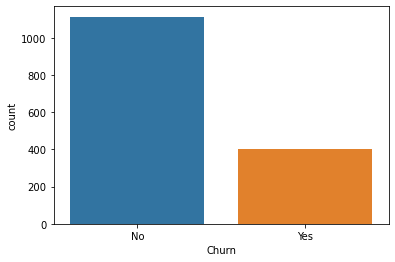

In [37]:
sns.countplot(data=fourPlus_children, x='Churn')

In [38]:
print(df.Children.mean(skipna=True), df.Children.median(skipna=True))

2.095936042638241 1.0


In [39]:
 abs(df.Children - df.Children.median()).median() /  0.6744897501960817 #MAD

1.482602218505602

In [40]:
abs(df.Children - df.Children.mean()).mean() /  0.6744897501960817 #MAD

2.4422597405628137

<AxesSubplot:xlabel='Children'>

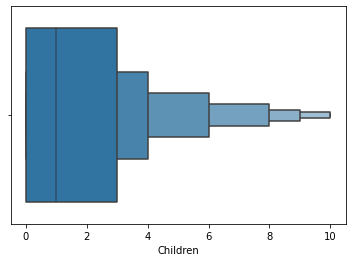

In [41]:
sns.boxenplot(data=df, x="Children")

(array([1919., 1874., 1100., 1096.,  769.,  161.,  135.,  149.,  158.,
         144.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

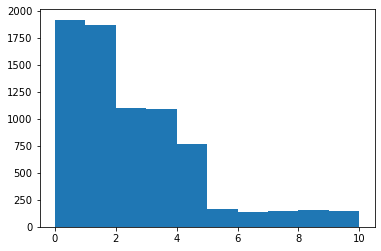

In [42]:
plt.hist(x=df.Children)

## after looking at children column we will use median to fill the Na values because it is more robust

In [43]:
child_sample = pd.DataFrame({
    'child': [df.Children.sample(frac=.5).mean() for _ in range(1000)]
})

In [44]:
child_sample

,child
0,2.105920
1,2.110194
2,2.112443
3,2.130864
4,2.116168
...,...
995,2.084325
996,2.082801
997,2.125233
998,2.105754


(array([ 15.,  35., 115., 212., 208., 214., 122.,  58.,  18.,   3.]),
 array([2.02598446, 2.04114303, 2.05630159, 2.07146015, 2.08661872,
        2.10177728, 2.11693584, 2.1320944 , 2.14725297, 2.16241153,
        2.17757009]),
 <BarContainer object of 10 artists>)

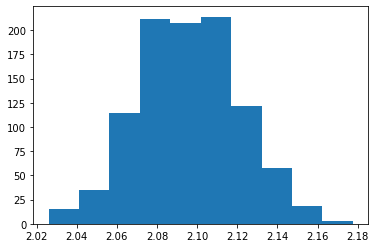

In [45]:
plt.hist(child_sample)

In [46]:
child_sample.mean(), child_sample.median()

(child    2.095899
 dtype: float64,
 child    2.095751
 dtype: float64)

In [47]:
for key, values in df.items():
    if pd.api.types.is_numeric_dtype(values):
        if pd.isnull(values).sum():
            if key == 'Children':
                #binary column
                df[key + 'IsMissing'] = pd.isnull(values)
                # filling NA values with median (more robust than mean)
                df[key] = values.fillna(value = 2)

In [48]:
df.Children.value_counts(dropna=False)

2.0     3595
0.0     1919
1.0     1874
3.0     1096
4.0      769
5.0      161
8.0      158
7.0      149
6.0      135
10.0      74
9.0       70
Name: Children, dtype: int64

### df.Children.fillna(value=2, inplace=True)

In [49]:
df.Children.value_counts(dropna=False)

2.0     3595
0.0     1919
1.0     1874
3.0     1096
4.0      769
5.0      161
8.0      158
7.0      149
6.0      135
10.0      74
9.0       70
Name: Children, dtype: int64

In [50]:
df.Age.value_counts(normalize=True)

55.0    0.017010
41.0    0.016213
77.0    0.016080
80.0    0.015947
57.0    0.015947
          ...   
87.0    0.012226
59.0    0.012226
78.0    0.012226
18.0    0.011960
47.0    0.011561
Name: Age, Length: 72, dtype: float64

<AxesSubplot:xlabel='Age', ylabel='Count'>

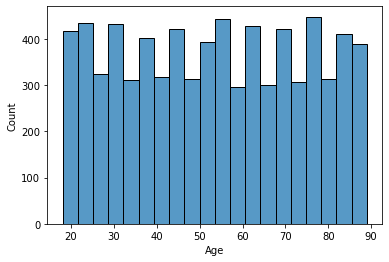

In [51]:
sns.histplot(data=df, x='Age')

In [52]:
age = pd.crosstab(index=df.Children, columns=df.Age)

<AxesSubplot:xlabel='Children', ylabel='Count'>

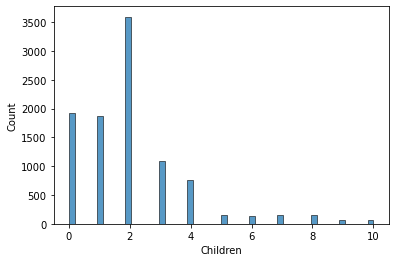

In [53]:
sns.histplot(data=age, x=df.Children)

<AxesSubplot:xlabel='Age', ylabel='Count'>

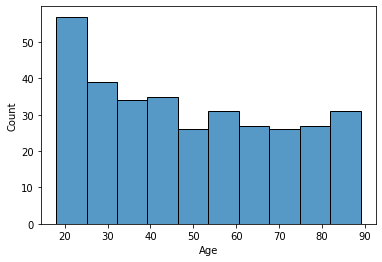

In [54]:
sns.histplot(data=df[df['Children'] > 6], x='Age')

In [55]:
Missing_values

Interaction              0.00
City                     0.00
State                    0.00
County                   0.00
Zip                      0.00
Lat                      0.00
Lng                      0.00
Population               0.00
Area                     0.00
Timezone                 0.00
Job                      0.00
Children                24.95
Age                     24.75
Education                0.00
Employment               0.00
Income                  24.90
Marital                  0.00
Gender                   0.00
Churn                    0.00
Outage_sec_perweek       0.00
Email                    0.00
Contacts                 0.00
Yearly_equip_failure     0.00
Techie                  24.77
Contract                 0.00
Port_modem               0.00
Tablet                   0.00
InternetService          0.00
Phone                   10.26
Multiple                 0.00
OnlineSecurity           0.00
OnlineBackup             0.00
DeviceProtection         0.00
TechSuppor

In [56]:
df.Age

1        68.0
2        27.0
3        50.0
4        48.0
5        83.0
         ... 
9996      NaN
9997     48.0
9998      NaN
9999     39.0
10000    28.0
Name: Age, Length: 10000, dtype: float64

In [57]:
print(df.Age.median(), df.Age.mean(), df.Age.std())

53.0 53.27574750830565 20.753927857649096


(array([853., 756., 714., 739., 708., 739., 728., 728., 761., 799.]),
 array([18. , 25.1, 32.2, 39.3, 46.4, 53.5, 60.6, 67.7, 74.8, 81.9, 89. ]),
 <BarContainer object of 10 artists>)

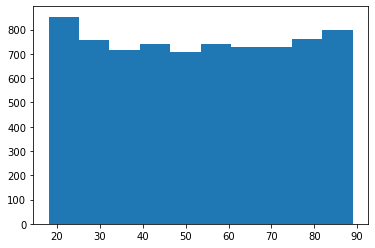

In [58]:
plt.hist(df.Age)

### I will use generalized imputation to try to find the age of the customer

 - I will use Techie column to see if it has a connection to the age column

In [59]:
pd.crosstab(index=df.Techie, columns=df.Age)

Age,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,...,80.0,81.0,82.0,83.0,84.0,85.0,86.0,87.0,88.0,89.0
Techie,,,,,,,,,,,,,,,,,,,,,
No,60,77,62,63,66,67,71,57,62,62,...,81,60,71,62,60,62,67,63,54,72
Yes,9,17,13,15,12,16,18,18,13,20,...,13,9,12,11,13,11,14,8,12,9


<AxesSubplot:xlabel='Techie', ylabel='Age'>

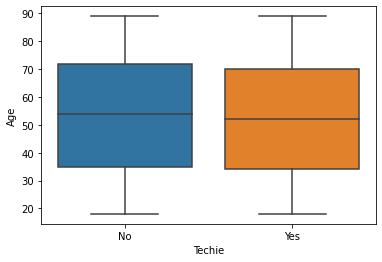

In [60]:
sns.boxplot(data=df, x='Techie', y='Age')

### from the eye this columns does not seem to have correlation

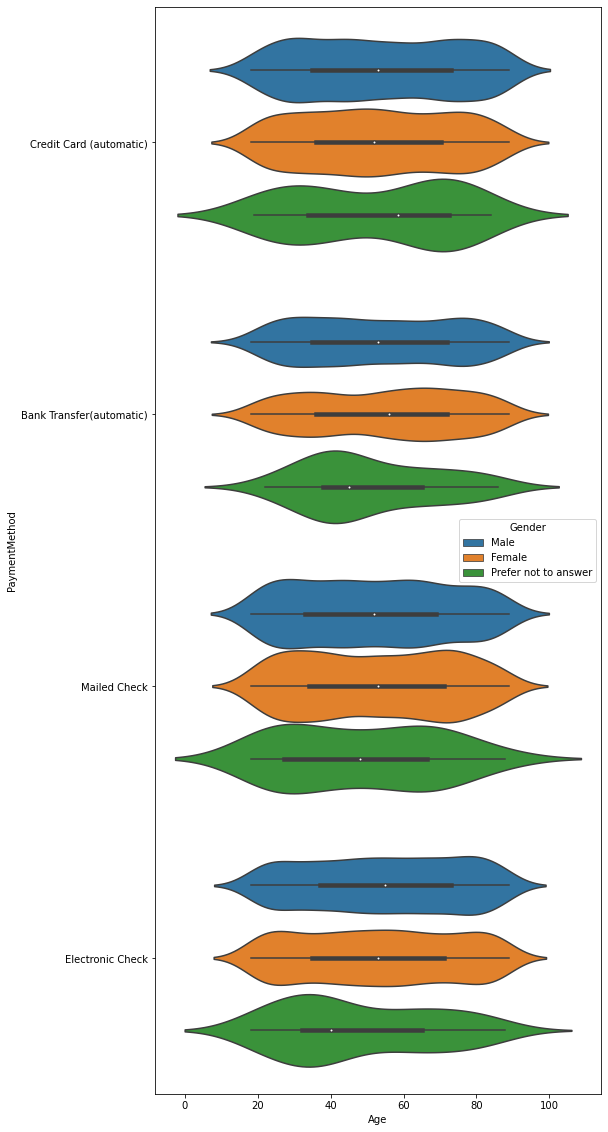

<Figure size 432x288 with 0 Axes>

In [61]:
fig, ax = plt.subplots(figsize=(8,20))
sns.violinplot(data=df, y='PaymentMethod', x='Age', hue='Gender', ax=ax)
plt.show()
plt.tight_layout()

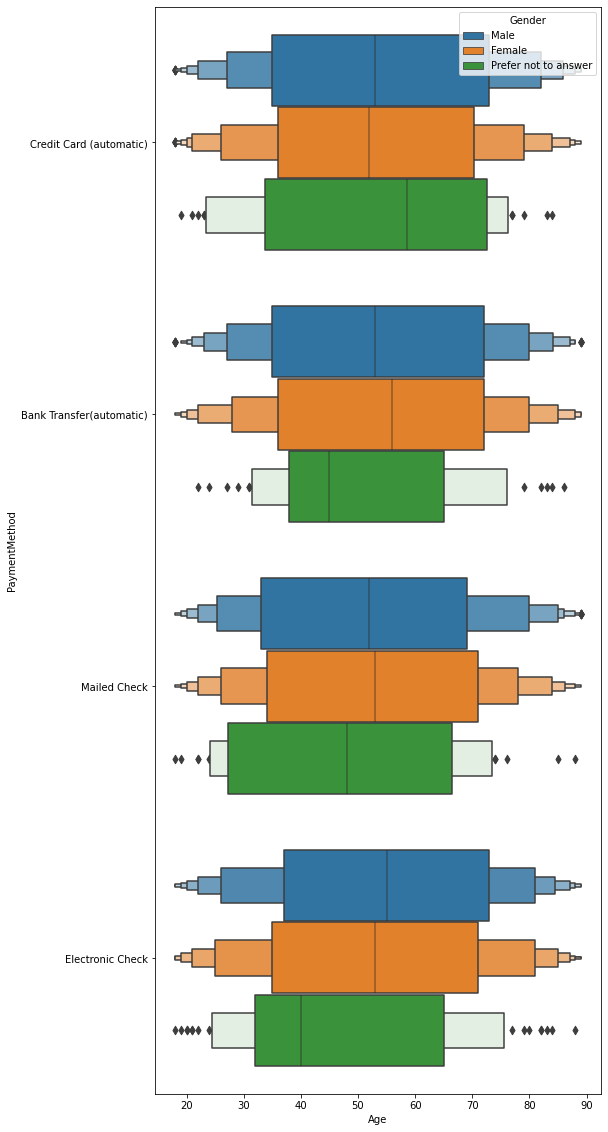

<Figure size 432x288 with 0 Axes>

In [62]:
fig, ax = plt.subplots(figsize=(8,20))
sns.boxenplot(data=df, y='PaymentMethod', x='Age', hue='Gender', ax=ax)
plt.show()
plt.tight_layout()

<AxesSubplot:xlabel='Age', ylabel='InternetService'>

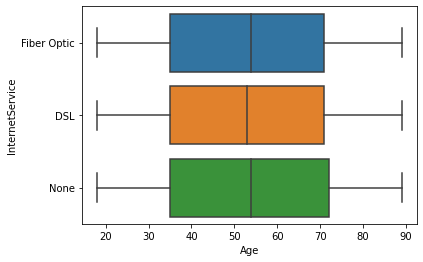

In [63]:
sns.boxplot(data=df, y='InternetService', x='Age')

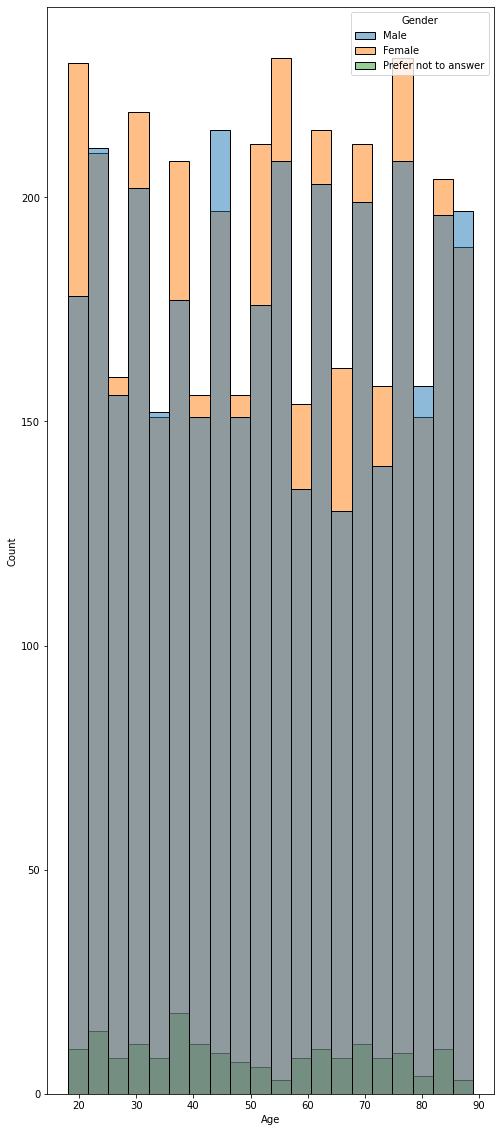

<Figure size 432x288 with 0 Axes>

In [64]:
fig, ax = plt.subplots(figsize=(8,20))
sns.histplot(data=df, x='Age', hue='Gender', ax=ax)
plt.show()
plt.tight_layout()

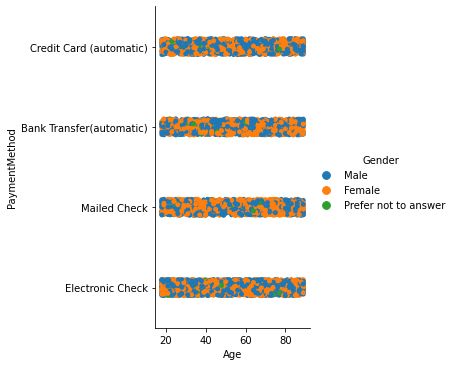

In [65]:
sns.catplot(data=df, y='PaymentMethod', x='Age', hue='Gender')

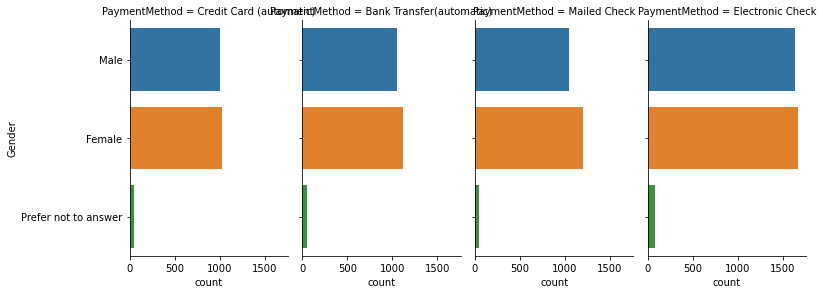

<Figure size 432x288 with 0 Axes>

In [66]:
sns.catplot(data=df, y='Gender', col='PaymentMethod',
           kind='count', height=4, aspect=.7)
plt.show()
plt.tight_layout()

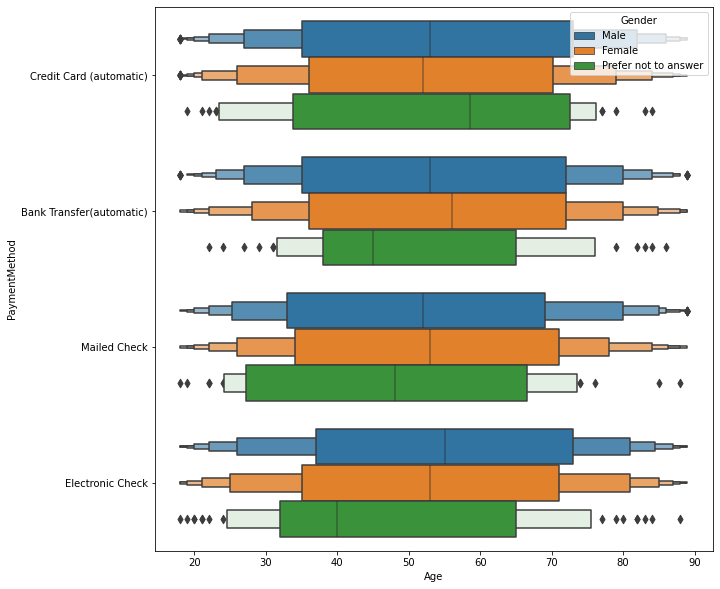

<Figure size 432x288 with 0 Axes>

In [67]:
fig, ax = plt.subplots(figsize=(10,10))
sns.boxenplot(data=df, y='PaymentMethod', x='Age', hue='Gender',
             dodge=True, ax=ax)
plt.show()
plt.tight_layout()

In [68]:
df.loc[df['Children'] == df.Children.isna]

,Interaction,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,...,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8,ChildrenIsMissing


In [69]:
def pay_method_gender(key1):
    male = df.Age.loc[(df['PaymentMethod'] == key1) &
               (df['Gender'] == 'Male')].median()
    female = df.Age.loc[(df['PaymentMethod'] == key1) &
               (df['Gender'] == 'Female')].median()
    return male, female

In [70]:
male_electronic, female_electronic = pay_method_gender('Electronic Check')
print('male electronic payment median age: ',male_electronic,
      '\nfemale electronic payment median age: ',female_electronic)

male electronic payment median age:  55.0 
female electronic payment median age:  53.0


In [71]:
key1, key2 = pay_method_gender('Mailed Check')
print('male Mailed_check median age: ', key1,
      '\nfemale Malied Check median age: ', key2)

male Mailed_check median age:  52.0 
female Malied Check median age:  53.0


In [72]:
key1, key2 = pay_method_gender('Bank Transfer(automatic)')
print('male Bank Transfer(automatic)  median age: ', key1,
      '\nfemale Bank Transfer(automatic) median age: ', key2)

male Bank Transfer(automatic)  median age:  53.0 
female Bank Transfer(automatic) median age:  56.0


In [73]:
key1, key2 = pay_method_gender('Credit Card (automatic)')
print('male Credit Card (automatic) median age: ', key1,
      '\nfemale Credit Card (automatic) median age: ', key2)

male Credit Card (automatic) median age:  53.0 
female Credit Card (automatic) median age:  52.0


### I will use these values to fill the missing values for age

In [74]:
df.PaymentMethod.value_counts(normalize=True, dropna=False)

Electronic Check            0.3398
Mailed Check                0.2290
Bank Transfer(automatic)    0.2229
Credit Card (automatic)     0.2083
Name: PaymentMethod, dtype: float64

In [75]:
df.loc[(df['PaymentMethod'] == 'Electronic Check') &
      (df["Gender"] == 'Male')].isna().sum()

Interaction               0
City                      0
State                     0
County                    0
Zip                       0
Lat                       0
Lng                       0
Population                0
Area                      0
Timezone                  0
Job                       0
Children                  0
Age                     415
Education                 0
Employment                0
Income                  392
Marital                   0
Gender                    0
Churn                     0
Outage_sec_perweek        0
Email                     0
Contacts                  0
Yearly_equip_failure      0
Techie                  421
Contract                  0
Port_modem                0
Tablet                    0
InternetService           0
Phone                   170
Multiple                  0
OnlineSecurity            0
OnlineBackup              0
DeviceProtection          0
TechSupport             157
StreamingTV               0
StreamingMovies     

In [76]:
df.to_csv('df_v1.csv', index='False')

In [77]:
df = pd.read_csv('df_v1.csv', index_col=0)
df

,Interaction,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,...,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8,ChildrenIsMissing
1,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,...,904.536110,5,5,5,3,4,4,3,4,True
2,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,...,800.982766,3,4,3,3,4,3,4,4,False
3,344d114c-3736-4be5-98f7-c72c281e2d35,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,...,2054.706961,4,4,2,4,4,3,3,3,False
4,abfa2b40-2d43-4994-b15a-989b8c79e311,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,...,2164.579412,4,4,4,2,5,4,3,3,False
5,68a861fd-0d20-4e51-a587-8a90407ee574,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,...,271.493436,4,4,4,3,4,4,4,5,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,45deb5a2-ae04-4518-bf0b-c82db8dbe4a4,Mount Holly,VT,Rutland,5758,43.43391,-72.78734,640,Rural,America/New_York,...,6511.253000,3,2,3,3,4,3,2,3,False
9997,6e96b921-0c09-4993-bbda-a1ac6411061a,Clarksville,TN,Montgomery,37042,36.56907,-87.41694,77168,Rural,America/Chicago,...,5695.952000,4,5,5,4,4,5,2,5,False
9998,e8307ddf-9a01-4fff-bc59-4742e03fd24f,Mobeetie,TX,Wheeler,79061,35.52039,-100.44180,406,Rural,America/Chicago,...,4159.306000,4,4,4,4,4,4,4,5,True
9999,3775ccfc-0052-4107-81ae-9657f81ecdf3,Carrollton,GA,Carroll,30117,33.58016,-85.13241,35575,Urban,America/New_York,...,6468.457000,4,4,6,4,3,3,5,4,False


In [78]:

# df['Age'].loc[(df['PaymentMethod'] == 'Electronic Check') &
#       (df["Gender"] == 'Male') & df['Age'].isnull()] = 55

# df['Age'].loc[(df['PaymentMethod'] == 'Electronic Check') &
#       (df["Gender"] == 'Female') & df['Age'].isnull()] = 53

In [79]:
# df['Age'].loc[(df['PaymentMethod'] == 'Mailed Check') &
#       (df["Gender"] == 'Male') & df['Age'].isnull()] = 52

# df['Age'].loc[(df['PaymentMethod'] == 'Mailed Check') &
#       (df["Gender"] == 'Female') & df['Age'].isnull()] = 53

In [80]:
# df['Age'].loc[(df['PaymentMethod'] == 'Bank Transfer(automatic)') &
#       (df["Gender"] == 'Male') & df['Age'].isnull()] = 53

# df['Age'].loc[(df['PaymentMethod'] == 'Bank Transfer(automatic)') &
#       (df["Gender"] == 'Female') & df['Age'].isnull()] = 56

In [81]:
# df['Age'].loc[(df['PaymentMethod'] == 'Credit Card (automatic)') &
#       (df["Gender"] == 'Male') & df['Age'].isnull()] = 52
# df['Age'].loc[(df['PaymentMethod'] == 'Credit Card (automatic)') &
#       (df["Gender"] == 'Female') & df['Age'].isnull()] = 53

In [82]:
for key, values in df.items():
    if pd.api.types.is_numeric_dtype(values):
        if pd.isnull(values).sum():
            if key == 'Age':
                # adding a binary column T/F
                df[key + 'Is_missing'] = pd.isnull(values)
                # adding Na values with the median since it is more robust
                df[key] = values.fillna(values.median())

In [83]:
df.Age.isna().sum()

0

In [84]:
df.dropna(subset=['Age'], inplace=True)

In [85]:
df.Gender.value_counts()

Female                  5025
Male                    4744
Prefer not to answer     231
Name: Gender, dtype: int64

In [86]:
df.Age.isna().sum()

0

In [87]:
prefer_not_answer = df.loc[df['Gender'] == 'Prefer not to answer']

<AxesSubplot:xlabel='count', ylabel='Churn'>

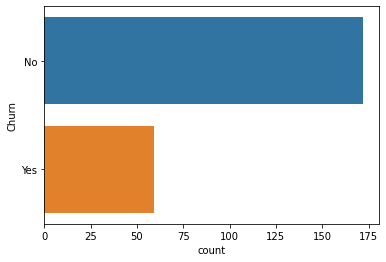

In [88]:
sns.countplot(data=prefer_not_answer, y='Churn')

In [89]:
df.isna().sum()

Interaction                0
City                       0
State                      0
County                     0
Zip                        0
Lat                        0
Lng                        0
Population                 0
Area                       0
Timezone                   0
Job                        0
Children                   0
Age                        0
Education                  0
Employment                 0
Income                  2490
Marital                    0
Gender                     0
Churn                      0
Outage_sec_perweek         0
Email                      0
Contacts                   0
Yearly_equip_failure       0
Techie                  2477
Contract                   0
Port_modem                 0
Tablet                     0
InternetService            0
Phone                   1026
Multiple                   0
OnlineSecurity             0
OnlineBackup               0
DeviceProtection           0
TechSupport              991
StreamingTV   

# lets fill the income values the same way we fill children column

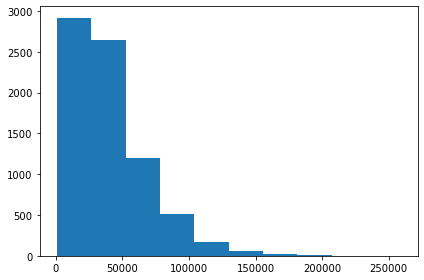

In [90]:
plt.hist(x=df.Income)
plt.tight_layout()

In [91]:
Income = df.Income

In [92]:
print('Income std: ', Income.std())
print('Income mean: ', Income.mean())
print('Income median:, ', Income.median())
print('mean - median: ', Income.mean() - Income.median())

Income std:  28358.469481693235
Income mean:  39936.76222636485
Income median:,  33186.785
mean - median:  6749.977226364848


In [93]:
Income.describe()

count      7510.000000
mean      39936.762226
std       28358.469482
min         740.660000
25%       19285.522500
50%       33186.785000
75%       53472.395000
max      258900.700000
Name: Income, dtype: float64

In [94]:
Income.isna().sum()

2490

In [95]:
Income.dropna(inplace=True)

In [96]:
Income

1       28561.99
2       21704.77
4       18925.23
5       40074.19
7       11467.50
          ...   
9992    30724.26
9993    35876.21
9995    56384.35
9996    55723.74
9999    16667.58
Name: Income, Length: 7510, dtype: float64

# let's see what happens if we trim the 10 percent from each tail using trim mean

In [97]:
trim_mean(Income, 0.1)

36259.04776797603

In [98]:
Predicting_mean = df.loc[:,['Employment', 'Education', 'Area', 
                       'MonthlyCharge', 'PaymentMethod', 'Income',
                           'Churn']]

In [99]:
Predicting_mean.dropna(subset=['Income'], inplace=True)

In [100]:
Predicting_mean.isna().sum()

Employment       0
Education        0
Area             0
MonthlyCharge    0
PaymentMethod    0
Income           0
Churn            0
dtype: int64

In [101]:
Education_income = Predicting_mean.groupby(by=['Education'])['Income'].mean()

In [102]:
Education_income

Education
9th Grade to 12th Grade, No Diploma         41148.621486
Associate's Degree                          37670.289539
Bachelor's Degree                           40555.871346
Doctorate Degree                            42462.288023
GED or Alternative Credential               39210.576912
Master's Degree                             39219.376729
No Schooling Completed                      43260.787683
Nursery School to 8th Grade                 38840.356024
Professional School Degree                  39962.128121
Regular High School Diploma                 39949.325930
Some College, 1 or More Years, No Degree    40595.201730
Some College, Less than 1 Year              38672.817812
Name: Income, dtype: float64

In [103]:
Predicting_mean.Income

1       28561.99
2       21704.77
4       18925.23
5       40074.19
7       11467.50
          ...   
9992    30724.26
9993    35876.21
9995    56384.35
9996    55723.74
9999    16667.58
Name: Income, Length: 7510, dtype: float64

<AxesSubplot:xlabel='Income', ylabel='MonthlyCharge'>

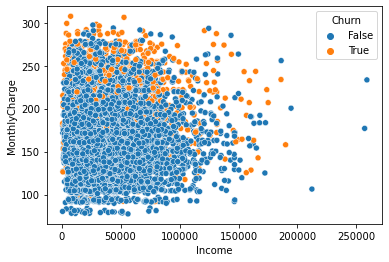

In [104]:
sns.scatterplot(data=Predicting_mean, x=Predicting_mean.Income, 
               y=Predicting_mean.MonthlyCharge, 
                hue=Predicting_mean.Churn.isin(['Yes']))

In [105]:
churn_y = Predicting_mean[Predicting_mean['Churn'] == 'Yes']

In [106]:
churn_n = Predicting_mean[Predicting_mean['Churn'] == 'No']

<AxesSubplot:xlabel='Income', ylabel='MonthlyCharge'>

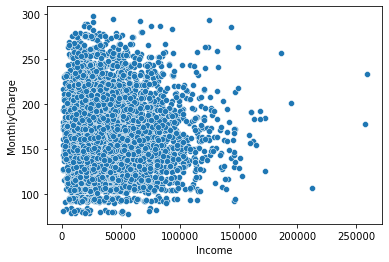

In [107]:
sns.scatterplot(data=churn_n, x=churn_n.Income,
               y=churn_n.MonthlyCharge)

<AxesSubplot:xlabel='Income', ylabel='MonthlyCharge'>

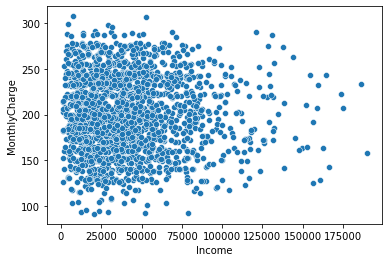

In [108]:
sns.scatterplot(data=churn_y, x=churn_y.Income,
               y=churn_y.MonthlyCharge)

- we can safely assumed that most of customers lie between the range of 20,000 and 50,000

In [109]:
churn_n.dropna(subset=['Income'], inplace=True)
churn_y.dropna(subset=['Income'], inplace=True)

<ipython-input-109-f83a19d87d77>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_n.dropna(subset=['Income'], inplace=True)
<ipython-input-109-f83a19d87d77>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_y.dropna(subset=['Income'], inplace=True)


In [110]:
churn_n.dtypes

Employment        object
Education         object
Area              object
MonthlyCharge    float64
PaymentMethod     object
Income           float64
Churn             object
dtype: object

In [111]:
#print(trim_mean(churn_n.MonthlyCharge, .10))
#print(trim_mean(churn_y.MonthlyCharge, .30))

In [112]:
churn_n.median()

MonthlyCharge      160.436505
Income           32920.005000
dtype: float64

In [113]:
churn_y.median()

MonthlyCharge      200.456763
Income           34286.930000
dtype: float64

In [114]:
print(trim_mean(churn_n.Income, .10))
print(trim_mean(churn_y.Income, .10))

36031.18613738738
36916.430592356686


In [115]:
print(robust.scale.mad(churn_n.Income))
print(robust.scale.mad(churn_y.Income))

23623.67996751297
24852.549642343518


In [116]:
len(churn_n), len(churn_y)

(5548, 1962)

In [117]:
sample_mean_1000_n = pd.DataFrame({
    'Income': [churn_y.Income.sample(frac=.5).mean() for _ in range(1000)]
})
sample_mean_1000_n.median()

Income    40684.363242
dtype: float64

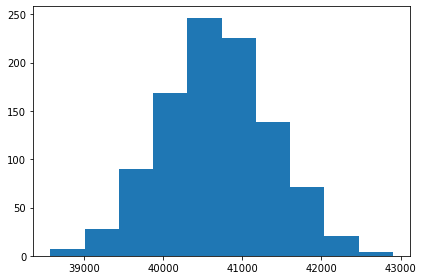

In [118]:
plt.hist(sample_mean_1000_n)
plt.tight_layout()

In [119]:
sample_mean_1000_y = pd.DataFrame({
    'Income': [churn_n.Income.sample(frac=.5).mean() for _ in range(1000)]
})

sample_mean_1000_y.median()

Income    39675.460207
dtype: float64

In [120]:
sample_mean_1000_y.median()

Income    39675.460207
dtype: float64

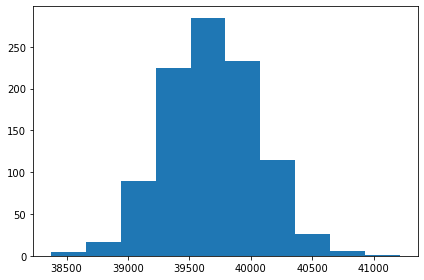

In [121]:
plt.hist(sample_mean_1000_y)
plt.tight_layout()

In [122]:
df["Income"].loc[(df['Churn'] == 'Yes') &
                df.Income.isnull()] = 36913.91969270167

df["Income"].loc[(df['Churn'] == 'No') &
                df.Income.isnull()] = 36028.79817564509

/Users/cristophernimatuj/Desktop/Master_folder/jupyter/Jupyter_notebook/env/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [123]:
df.isna().sum()

Interaction                0
City                       0
State                      0
County                     0
Zip                        0
Lat                        0
Lng                        0
Population                 0
Area                       0
Timezone                   0
Job                        0
Children                   0
Age                        0
Education                  0
Employment                 0
Income                     0
Marital                    0
Gender                     0
Churn                      0
Outage_sec_perweek         0
Email                      0
Contacts                   0
Yearly_equip_failure       0
Techie                  2477
Contract                   0
Port_modem                 0
Tablet                     0
InternetService            0
Phone                   1026
Multiple                   0
OnlineSecurity             0
OnlineBackup               0
DeviceProtection           0
TechSupport              991
StreamingTV   

In [124]:
df.to_csv("Income_value_filled.csv")

In [125]:
df.Techie

1         No
2        Yes
3        Yes
4        Yes
5         No
        ... 
9996     NaN
9997     NaN
9998      No
9999      No
10000    NaN
Name: Techie, Length: 10000, dtype: object

<AxesSubplot:xlabel='count', ylabel='Techie'>

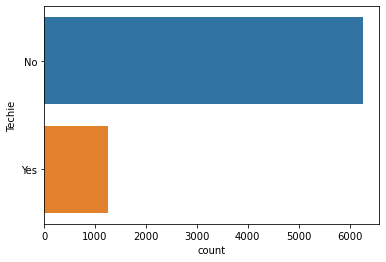

In [126]:
sns.countplot(data=df, y='Techie')

In [127]:
df.Techie.value_counts(dropna=True, normalize=True) * 100

No     83.29124
Yes    16.70876
Name: Techie, dtype: float64

In [128]:
pd.crosstab(index=[df.Techie], columns=df.Churn)

Churn,No,Yes
Techie,,
No,4697,1569
Yes,830,427


In [129]:
techie_nulls = df.loc[df['Techie'].isnull()]

<AxesSubplot:xlabel='count', ylabel='Churn'>

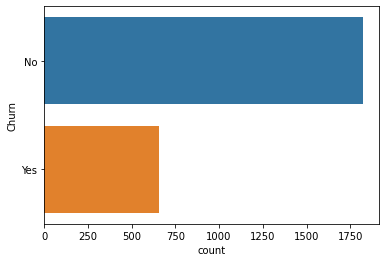

In [130]:
sns.countplot(data=techie_nulls, y='Churn')

### This columns seems relevant. We will not touch it, but I will add a binary column for the missing values (T/F)

In [131]:
pd.api.types.is_string_dtype(df['Techie'])

True

In [132]:
df.isna().sum()

Interaction                0
City                       0
State                      0
County                     0
Zip                        0
Lat                        0
Lng                        0
Population                 0
Area                       0
Timezone                   0
Job                        0
Children                   0
Age                        0
Education                  0
Employment                 0
Income                     0
Marital                    0
Gender                     0
Churn                      0
Outage_sec_perweek         0
Email                      0
Contacts                   0
Yearly_equip_failure       0
Techie                  2477
Contract                   0
Port_modem                 0
Tablet                     0
InternetService            0
Phone                   1026
Multiple                   0
OnlineSecurity             0
OnlineBackup               0
DeviceProtection           0
TechSupport              991
StreamingTV   

In [133]:
for key, values in df.items():
    if pd.api.types.is_string_dtype(values):
        print(key)

Interaction
City
State
County
Area
Timezone
Job
Education
Employment
Marital
Gender
Churn
Techie
Contract
Port_modem
Tablet
InternetService
Phone
Multiple
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
PaperlessBilling
PaymentMethod


In [134]:
for key, values in df.items():
    if pd.api.types.is_string_dtype(values):
        if values.isnull().sum():
            print(key)

Techie
Phone
TechSupport


In [135]:
for key, values in df.items():
    if pd.api.types.is_string_dtype(values):
        if values.isnull().sum():
            df[key+'is_missing'] = pd.isnull(values)
            df[key] = pd.Categorical(values).codes+1
            # the reason behind codes.+1 is so new the column value is 0 and not 1

In [136]:
df.isna().sum()

Interaction                 0
City                        0
State                       0
County                      0
Zip                         0
Lat                         0
Lng                         0
Population                  0
Area                        0
Timezone                    0
Job                         0
Children                    0
Age                         0
Education                   0
Employment                  0
Income                      0
Marital                     0
Gender                      0
Churn                       0
Outage_sec_perweek          0
Email                       0
Contacts                    0
Yearly_equip_failure        0
Techie                      0
Contract                    0
Port_modem                  0
Tablet                      0
InternetService             0
Phone                       0
Multiple                    0
OnlineSecurity              0
OnlineBackup                0
DeviceProtection            0
TechSuppor

In [137]:
df.Techie.value_counts()

1    6266
0    2477
2    1257
Name: Techie, dtype: int64

In [138]:
df.to_csv('df_v2.csv')

In [139]:
df = pd.read_csv('df_v2.csv', index_col=0)

In [140]:
df.head()

,Interaction,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,...,item4,item5,item6,item7,item8,ChildrenIsMissing,AgeIs_missing,Techieis_missing,Phoneis_missing,TechSupportis_missing
1,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,...,3,4,4,3,4,True,False,False,False,False
2,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,...,3,4,3,4,4,False,False,False,False,False
3,344d114c-3736-4be5-98f7-c72c281e2d35,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,...,4,4,3,3,3,False,False,False,False,False
4,abfa2b40-2d43-4994-b15a-989b8c79e311,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,...,2,5,4,3,3,False,False,False,False,False
5,68a861fd-0d20-4e51-a587-8a90407ee574,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,...,3,4,4,4,5,False,False,False,False,False


In [141]:
df.isna().sum()

Interaction                 0
City                        0
State                       0
County                      0
Zip                         0
Lat                         0
Lng                         0
Population                  0
Area                        0
Timezone                    0
Job                         0
Children                    0
Age                         0
Education                   0
Employment                  0
Income                      0
Marital                     0
Gender                      0
Churn                       0
Outage_sec_perweek          0
Email                       0
Contacts                    0
Yearly_equip_failure        0
Techie                      0
Contract                    0
Port_modem                  0
Tablet                      0
InternetService             0
Phone                       0
Multiple                    0
OnlineSecurity              0
OnlineBackup                0
DeviceProtection            0
TechSuppor

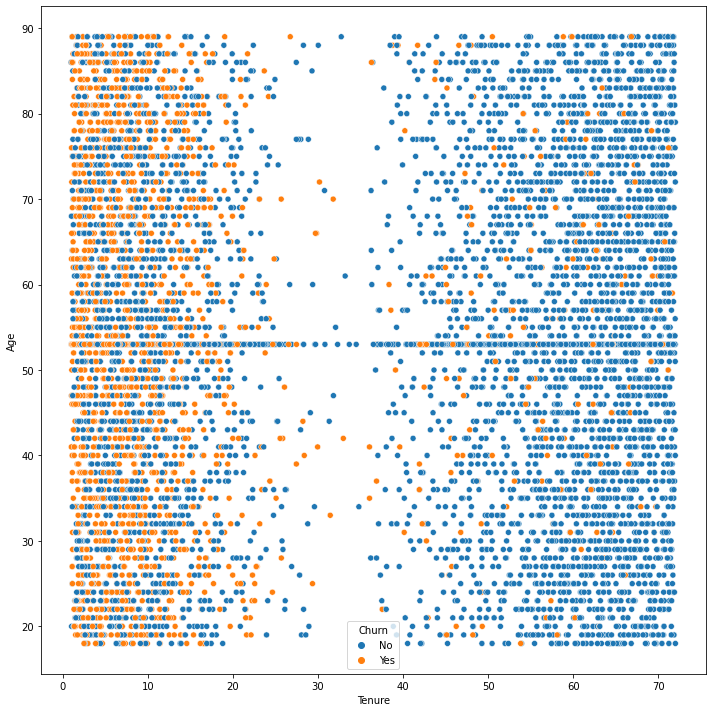

In [142]:
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(data=df, x='Tenure', y='Age', hue='Churn',
               ax=ax)
plt.tight_layout()
plt.show()

In [143]:
df.Bandwidth_GB_Year

1         904.536110
2         800.982766
3        2054.706961
4        2164.579412
5         271.493436
            ...     
9996     6511.253000
9997     5695.952000
9998     4159.306000
9999     6468.457000
10000    5857.586000
Name: Bandwidth_GB_Year, Length: 10000, dtype: float64

In [144]:
age_tenure = df.loc[:,['Tenure', 'Age', 'Churn']]

In [145]:
age_tenure

,Tenure,Age,Churn
1,6.795513,68.0,No
2,1.156681,27.0,Yes
3,15.754144,50.0,No
4,17.087227,48.0,No
5,1.670972,83.0,Yes
...,...,...,...
9996,68.197130,53.0,No
9997,61.040370,48.0,No
9998,NaN,53.0,No
9999,71.095600,39.0,No


In [146]:
age_tenure.loc[age_tenure['Tenure'].isnull()]

,Tenure,Age,Churn
8,NaN,53.0,Yes
12,NaN,56.0,No
18,NaN,60.0,Yes
29,NaN,53.0,Yes
32,NaN,40.0,No
...,...,...,...
9979,NaN,53.0,No
9980,NaN,57.0,Yes
9989,NaN,64.0,No
9995,NaN,46.0,No


In [147]:
age_tenure.loc[(age_tenure.Age < 30)].median()

Tenure    25.172522
Age       24.000000
dtype: float64

In [148]:
age_tenure.loc[(age_tenure.Age >= 30) &
              (age_tenure.Age < 40)].median()

Tenure    38.27775
Age       34.00000
dtype: float64

In [149]:
age_tenure.loc[(age_tenure.Age >= 40) &
              (age_tenure.Age < 50)].median()

Tenure    28.229886
Age       44.000000
dtype: float64

In [150]:
age_tenure.loc[(age_tenure.Age >= 50) &
              (age_tenure.Age < 60)].median()

Tenure    37.04844
Age       53.00000
dtype: float64

In [151]:
age_tenure.loc[(age_tenure.Age >= 60) &
              (age_tenure.Age < 70)].median()

Tenure    40.96005
Age       64.00000
dtype: float64

In [152]:
age_tenure.loc[(age_tenure.Age >= 70) &
              (age_tenure.Age < 80)].median()

Tenure    30.177801
Age       75.000000
dtype: float64

In [153]:
age_tenure.loc[(age_tenure.Age >= 80) &
              (age_tenure.Age < 90)].median()


Tenure    36.44011
Age       84.00000
dtype: float64

In [154]:
for key, values in df.items():
    if pd.api.types.is_numeric_dtype:
        if pd.isnull(values).sum():
            if key == 'Tenure':
                df[key+'_is_missing'] = pd.isnull(values)

In [155]:
df['Tenure'].loc[df['Tenure'].isnull() &
      (df.Age < 30)] = 25.172522

df["Tenure"].loc[df['Tenure'].isnull() &
      (df.Age >= 30) &
       (df.Age < 40)] = 38.23

df["Tenure"].loc[df['Tenure'].isnull() &
      (df.Age >= 40) &
       (df.Age < 50)] = 28.23

df["Tenure"].loc[df['Tenure'].isnull() &
      (df.Age >= 50) &
       (df.Age < 60)] = 37.78

df["Tenure"].loc[df['Tenure'].isnull() &
      (df.Age >= 60) &
       (df.Age < 70)] = 40.96

df["Tenure"].loc[df['Tenure'].isnull() &
      (df.Age >= 70) &
       (df.Age < 80)] = 30.18

df["Tenure"].loc[df['Tenure'].isnull() &
      (df.Age >= 80) &
       (df.Age < 90)] = 36.44 

/Users/cristophernimatuj/Desktop/Master_folder/jupyter/Jupyter_notebook/env/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/cristophernimatuj/Desktop/Master_folder/jupyter/Jupyter_notebook/env/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/cristophernimatuj/Desktop/Master_folder/jupyter/Jupyter_notebook/env/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value i

In [156]:
# df['Tenure'].loc[df['Tenure'].isnull() &
#       (age_tenure.Age < 30)] = 25.172522

# df["Tenure"].loc[df['Tenure'].isnull() &
#       (age_tenure.Age >= 30) &
#        (age_tenure.Age < 40)] = 38.23

# df["Tenure"].loc[df['Tenure'].isnull() &
#       (age_tenure.Age >= 40) &
#        (age_tenure.Age < 50)] = 28.23

# df["Tenure"].loc[df['Tenure'].isnull() &
#       (age_tenure.Age >= 50) &
#        (age_tenure.Age < 60)] = 37.78

# df["Tenure"].loc[df['Tenure'].isnull() &
#       (age_tenure.Age >= 60) &
#        (age_tenure.Age < 70)] = 40.96

# df["Tenure"].loc[df['Tenure'].isnull() &
#       (age_tenure.Age >= 70) &
#        (age_tenure.Age < 80)] = 30.18

# df["Tenure"].loc[df['Tenure'].isnull() &
#       (age_tenure.Age >= 80) &
#        (age_tenure.Age < 90)] = 36.44 

In [157]:
df.isna().sum()

Interaction                 0
City                        0
State                       0
County                      0
Zip                         0
Lat                         0
Lng                         0
Population                  0
Area                        0
Timezone                    0
Job                         0
Children                    0
Age                         0
Education                   0
Employment                  0
Income                      0
Marital                     0
Gender                      0
Churn                       0
Outage_sec_perweek          0
Email                       0
Contacts                    0
Yearly_equip_failure        0
Techie                      0
Contract                    0
Port_modem                  0
Tablet                      0
InternetService             0
Phone                       0
Multiple                    0
OnlineSecurity              0
OnlineBackup                0
DeviceProtection            0
TechSuppor

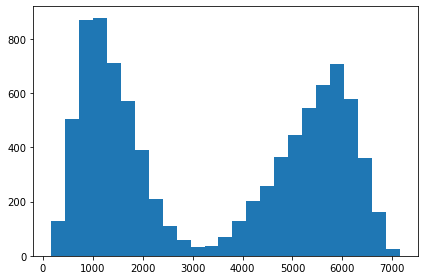

In [158]:
plt.hist(x=df.Bandwidth_GB_Year, bins=25)
plt.tight_layout()

In [159]:
df.Bandwidth_GB_Year.describe()

count    8979.000000
mean     3398.842752
std      2187.396807
min       155.506715
25%      1234.110529
50%      3382.424000
75%      5587.096500
max      7158.982000
Name: Bandwidth_GB_Year, dtype: float64

In [160]:
Bandwidth = df.loc[df.Bandwidth_GB_Year.isnull()][['InternetService', 'Phone',
                                       'Bandwidth_GB_Year']]

In [161]:
Bandwidth.InternetService.value_counts()

Fiber Optic    432
DSL            374
None           215
Name: InternetService, dtype: int64

In [162]:
Bandwidth.Phone.value_counts()

2    811
0    116
1     94
Name: Phone, dtype: int64

In [163]:
Bandwidth.loc[(df.Phone == 1) &
             (df['InternetService'] == 'None')]

,InternetService,Phone,Bandwidth_GB_Year
1196,None,1,NaN
1918,None,1,NaN
1996,None,1,NaN
2071,None,1,NaN
3564,None,1,NaN
3597,None,1,NaN
4042,None,1,NaN
4343,None,1,NaN
4653,None,1,NaN
5810,None,1,NaN


In [164]:
[Bandwidth['InternetService'] == 'None']

[15      False
 34      False
 41      False
 46       True
 59       True
         ...  
 9897    False
 9915    False
 9940     True
 9987    False
 9989    False
 Name: InternetService, Length: 1021, dtype: bool]

In [165]:
for key, values in df.items():
    if pd.api.types.is_numeric_dtype(values):
        if pd.isnull(values).sum():
            if key == 'Bandwidth_GB_Year':
                # adding binary column
                df[key+'Is_missing'] = pd.isnull(values)
                #filling na values with band findings
                df[key] = values.fillna(value=3399.029431)

In [166]:
df.isna().sum()

Interaction                    0
City                           0
State                          0
County                         0
Zip                            0
Lat                            0
Lng                            0
Population                     0
Area                           0
Timezone                       0
Job                            0
Children                       0
Age                            0
Education                      0
Employment                     0
Income                         0
Marital                        0
Gender                         0
Churn                          0
Outage_sec_perweek             0
Email                          0
Contacts                       0
Yearly_equip_failure           0
Techie                         0
Contract                       0
Port_modem                     0
Tablet                         0
InternetService                0
Phone                          0
Multiple                       0
OnlineSecu

In [167]:
len(df)

10000

In [168]:
df.Churn

1         No
2        Yes
3         No
4         No
5        Yes
        ... 
9996      No
9997      No
9998      No
9999      No
10000     No
Name: Churn, Length: 10000, dtype: object

In [169]:
for key, values in df.items():
    if not pd.api.types.is_numeric_dtype(values):
        print(key)

Interaction
City
State
County
Area
Timezone
Job
Education
Employment
Marital
Gender
Churn
Contract
Port_modem
Tablet
InternetService
Multiple
OnlineSecurity
OnlineBackup
DeviceProtection
StreamingTV
StreamingMovies
PaperlessBilling
PaymentMethod


In [170]:
df.to_csv('No_null_values.csv')

In [171]:
df_no_null = pd.read_csv('No_null_values.csv',
                        index_col=[0])

In [172]:
df_no_null

,Interaction,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,...,item6,item7,item8,ChildrenIsMissing,AgeIs_missing,Techieis_missing,Phoneis_missing,TechSupportis_missing,Tenure_is_missing,Bandwidth_GB_YearIs_missing
1,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,...,4,3,4,True,False,False,False,False,False,False
2,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,...,3,4,4,False,False,False,False,False,False,False
3,344d114c-3736-4be5-98f7-c72c281e2d35,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,...,3,3,3,False,False,False,False,False,False,False
4,abfa2b40-2d43-4994-b15a-989b8c79e311,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,...,4,3,3,False,False,False,False,False,False,False
5,68a861fd-0d20-4e51-a587-8a90407ee574,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,...,4,4,5,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,45deb5a2-ae04-4518-bf0b-c82db8dbe4a4,Mount Holly,VT,Rutland,5758,43.43391,-72.78734,640,Rural,America/New_York,...,3,2,3,False,True,True,True,False,False,False
9997,6e96b921-0c09-4993-bbda-a1ac6411061a,Clarksville,TN,Montgomery,37042,36.56907,-87.41694,77168,Rural,America/Chicago,...,5,2,5,False,False,True,True,False,False,False
9998,e8307ddf-9a01-4fff-bc59-4742e03fd24f,Mobeetie,TX,Wheeler,79061,35.52039,-100.44180,406,Rural,America/Chicago,...,4,4,5,True,True,False,False,False,True,False
9999,3775ccfc-0052-4107-81ae-9657f81ecdf3,Carrollton,GA,Carroll,30117,33.58016,-85.13241,35575,Urban,America/New_York,...,3,5,4,False,False,False,False,False,False,False


In [173]:
for key, values in df_no_null.items():
    if not pd.api.types.is_numeric_dtype(values):
        print(key)

Interaction
City
State
County
Area
Timezone
Job
Education
Employment
Marital
Gender
Churn
Contract
Port_modem
Tablet
InternetService
Multiple
OnlineSecurity
OnlineBackup
DeviceProtection
StreamingTV
StreamingMovies
PaperlessBilling
PaymentMethod


In [174]:
df_no_null.dtypes

Interaction                     object
City                            object
State                           object
County                          object
Zip                              int64
Lat                            float64
Lng                            float64
Population                       int64
Area                            object
Timezone                        object
Job                             object
Children                       float64
Age                            float64
Education                       object
Employment                      object
Income                         float64
Marital                         object
Gender                          object
Churn                           object
Outage_sec_perweek             float64
Email                            int64
Contacts                         int64
Yearly_equip_failure             int64
Techie                           int64
Contract                        object
Port_modem               